In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
books = pd.read_csv("Datasets/clean_books.csv")
books.head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,2019,Childrens


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB


In [8]:
books.value_counts("genre")

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [10]:
books["genre"].value_counts()

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64

In [12]:
books.describe()

,rating,year
count,350.000000,350.000000
mean,4.608571,2013.508571
std,0.226941,3.284711
min,3.300000,2009.000000
25%,4.500000,2010.000000
50%,4.600000,2013.000000
75%,4.800000,2016.000000
max,4.900000,2019.000000


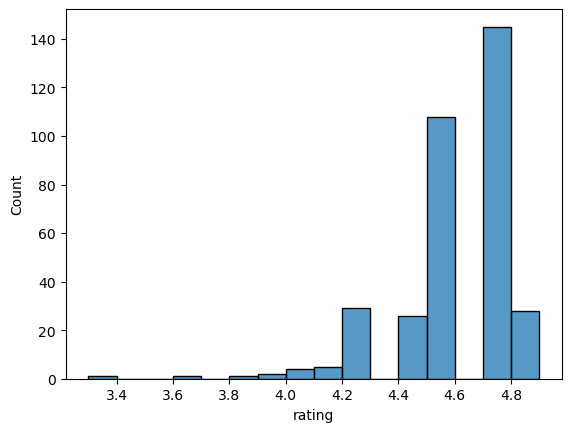

In [20]:
sns.histplot(data=books,x="rating",binwidth=.1)
plt.show()

In [24]:
books.dtypes

name       object
author     object
rating    float64
year        int64
genre      object
dtype: object

In [26]:
books["genre"].isin(['Fiction','Non Fiction'])

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool

In [28]:
~books["genre"].isin(['Fiction','Non Fiction'])

0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool

In [32]:
books[books['genre'].isin(['Fiction','Non Fiction'])].head()

,name,author,rating,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,2011,Fiction


In [36]:
books.select_dtypes('number').head()

,rating,year
0,4.7,2016
1,4.6,2011
2,4.7,2018
3,4.7,2017
4,4.8,2019


In [38]:
books['year'].min()

2009

In [40]:
books['year'].max()

2019

<Axes: xlabel='year'>

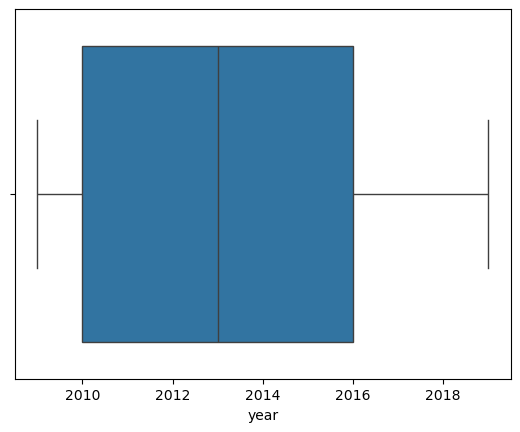

In [46]:
sns.boxplot(data=books, x="year")

<Axes: xlabel='year', ylabel='genre'>

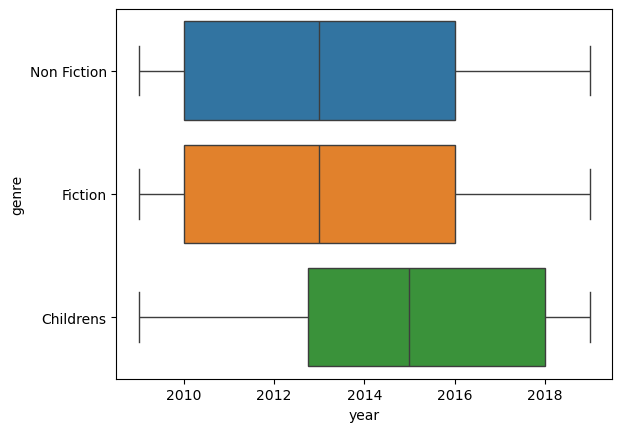

In [50]:
sns.boxplot(data=books, x="year", y="genre",hue="genre")

In [54]:
books.groupby("genre")[['rating','year']].mean()

,rating,year
genre,,
Childrens,4.780000,2015.075000
Fiction,4.570229,2013.022901
Non Fiction,4.598324,2013.513966


In [58]:
books[['rating','year']].agg(['mean','std'])

,rating,year
mean,4.608571,2013.508571
std,0.226941,3.284711


In [60]:
books.agg({'rating':['mean','median'], 'year':['std']})

,rating,year
mean,4.608571,NaN
median,4.600000,NaN
std,NaN,3.284711


In [70]:
books.groupby('genre').agg(mean_review=('rating','mean'),std_review=('rating','median'))

,mean_review,std_review
genre,,
Childrens,4.780000,4.8
Fiction,4.570229,4.6
Non Fiction,4.598324,4.6


<Axes: xlabel='genre', ylabel='rating'>

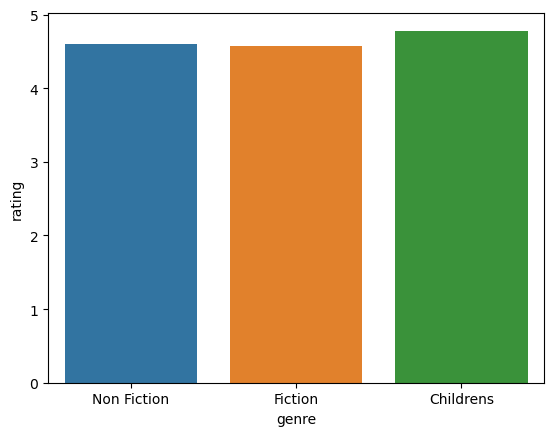

In [76]:
sns.barplot(data=books, x="genre",y="rating",hue="genre",errorbar=None)

In [183]:
sal = pd.read_csv("Datasets/Data_Jobs.csv")
sal.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0


<Axes: xlabel='Experience', ylabel='Salary_USD'>

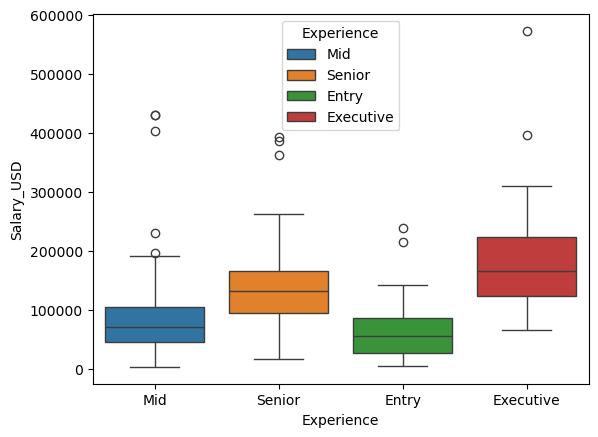

In [185]:
sns.boxplot(data=sal, x="Experience", y="Salary_USD",hue="Experience")

In [98]:
sal.isna().sum()

Working_Year            12
Designation             27
Experience              33
Employment_Status       31
Employee_Location       28
Company_Size            40
Remote_Working_Ratio    24
Salary_USD              60
dtype: int64

In [102]:
threshold = len(sal)*0.05

threshold

30.35

In [110]:
cols_to_drop = sal.columns[sal.isna().sum() < threshold]
cols_to_drop

Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')

In [112]:
sal.dropna(subset=cols_to_drop,inplace=True)

In [114]:
sal.isna().sum()

Working_Year             0
Designation              0
Experience               5
Employment_Status        3
Employee_Location        0
Company_Size            12
Remote_Working_Ratio     0
Salary_USD              32
dtype: int64

In [126]:
for col in sal.columns[sal.isna().sum() > 0][:-1]:
    sal[col] = sal[col].fillna(sal[col].mode()[0])

In [128]:
sal.isna().sum()

Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              32
dtype: int64

In [134]:
median_salary = sal.groupby('Experience')['Salary_USD'].median().to_dict()

In [140]:
sal['Salary_USD'] = sal['Salary_USD'].fillna(sal['Experience'].map(median_salary))

In [142]:
sal.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

In [144]:
sal.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L
5,Data Analyst,Entry,FT,US,L


In [146]:
sal['Designation'].value_counts()

Designation
Data Scientist                              138
Data Engineer                               121
Data Analyst                                 96
Machine Learning Engineer                    40
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Data Science Consultant                       7
Director of Data Science                      7
AI Scientist                                  7
Machine Learning Scientist                    6
Big Data Engineer                             6
Lead Data Engineer                            6
Principal Data Scientist                      6
Data Analytics Manager                        6
Computer Vision Engineer                      6
Head of Data                                  5
Applied Data Scientist                        5
BI Data Analyst                               5
Business Data Analyst                         5
ML Engineer                 

In [152]:
sal['Designation'].nunique()

50

In [154]:
sal['Designation'].str.contains('Machine Learning | AI')

0      False
1       True
3      False
4       True
5      False
       ...  
601    False
603    False
604    False
605    False
606    False
Name: Designation, Length: 579, dtype: bool

In [156]:
job_categories = ["Data Science","Data Analytics","Data Engineering",
"Machine Learning","Managerial","Consultant"]

In [158]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

In [164]:
conditions = [(sal['Designation'].str.contains(data_science)),
             (sal['Designation'].str.contains(data_analyst)),
             (sal['Designation'].str.contains(data_engineer)),
             (sal['Designation'].str.contains(ml_engineer)),
             (sal['Designation'].str.contains(manager)),
             (sal['Designation'].str.contains(consultant))]

In [166]:
sal['job_categories'] = np.select(conditions,
                                 job_categories,
                                 default='Others')

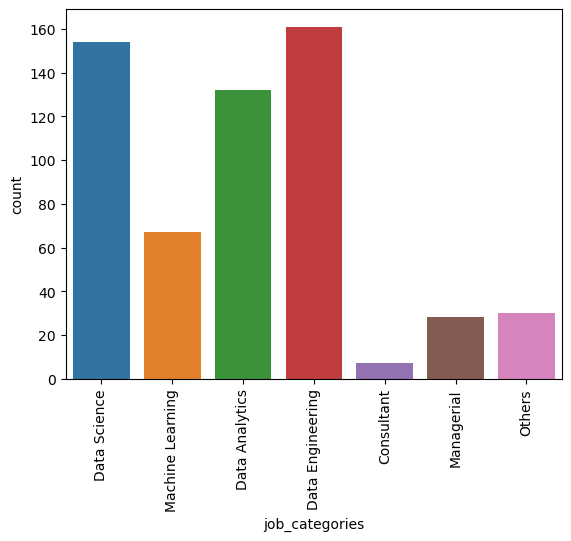

In [175]:
sns.countplot(data=sal,x="job_categories",hue="job_categories")

plt.xticks(rotation=90)
plt.show()

In [188]:
salary = pd.read_csv('Datasets/Salary.csv')
salary.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,"$76,227"
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,"$248,257"
2,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,"$19,097"
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,"$143,225"


In [190]:
salary['Salary_USD'] = salary['Salary_USD'].str.replace('$','')
salary['Salary_USD'] = salary['Salary_USD'].str.replace(',','')
salary['Salary_USD'] = salary['Salary_USD'].astype(float)

salary.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0
2,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0


In [192]:
salary.groupby('Company_Size')['Salary_USD'].mean()

Company_Size
L    114295.097826
M    113150.314879
S     77750.621622
Name: Salary_USD, dtype: float64

In [194]:
salary['sal_std'] = salary.groupby('Experience')['Salary_USD'].transform(lambda x: x.std())

In [196]:
salary.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,sal_std
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0,61287.170349
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0,56676.622113
2,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0,61287.170349
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0,56676.622113


In [198]:
salary['sal_median_comp_size'] = salary.groupby('Company_Size')['Salary_USD'].transform(lambda x: x.median())

In [200]:
salary.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,sal_std,sal_median_comp_size
0,2020.0,Data Scientist,Mid,FT,DE,L,0.0,76227.0,61287.170349,95483.0
1,2020.0,Machine Learning Scientist,Senior,FT,JP,S,0.0,248257.0,56676.622113,68624.5
2,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,Product Data Analyst,Mid,FT,HN,S,0.0,19097.0,61287.170349,68624.5
4,2020.0,Machine Learning Engineer,Senior,FT,US,L,50.0,143225.0,56676.622113,95483.0


In [202]:
salary['Salary_USD'].describe()

count       547.000000
mean     108746.407678
std       69166.397111
min        3819.000000
25%       60880.500000
50%       97489.000000
75%      143826.500000
max      572900.000000
Name: Salary_USD, dtype: float64

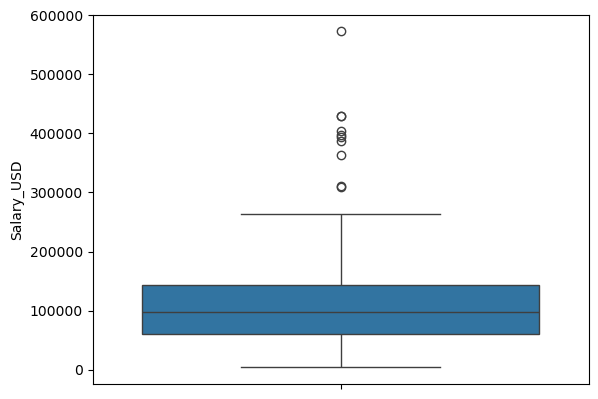

In [206]:
sns.boxplot(data=salary, y="Salary_USD")
plt.show()

In [208]:
seventy_fifth_perc = salary['Salary_USD'].quantile(0.75)
twenty_fifth_perc = salary['Salary_USD'].quantile(0.25)

sal_iqr = seventy_fifth_perc - twenty_fifth_perc

In [210]:
sal_iqr

82946.0

In [224]:
upper = seventy_fifth_perc + (1.5 * sal_iqr)
lower = twenty_fifth_perc - (1.5 * sal_iqr)

upper, lower

(268245.5, -63538.5)

In [240]:
salary_with_no_outliers = salary[(salary['Salary_USD'] < upper) & (salary['Salary_USD'] > lower)]

In [242]:
salary_with_no_outliers['Salary_USD'].describe()

count       537.000000
mean     103330.176909
std       56330.976455
min        3819.000000
25%       59821.000000
50%       95483.000000
75%      143225.000000
max      263534.000000
Name: Salary_USD, dtype: float64

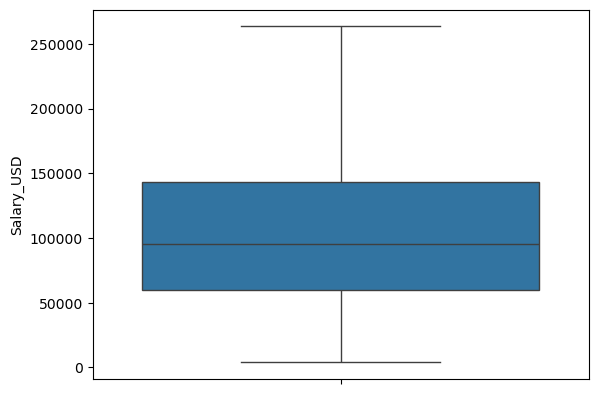

In [244]:
sns.boxplot(data=salary_with_no_outliers, y="Salary_USD")
plt.show()

In [300]:
div = pd.read_csv("Datasets/divorce.csv",parse_dates=['divorce_date','dob_man','dob_woman'])
div.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [302]:
div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   object        
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](3), float64(4), object(3)
memory usage: 172.7+ KB


In [304]:
div['marriage_date'] = pd.to_datetime(div['marriage_date'])
div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
dtypes: datetime64[ns](4), float64(4), object(2)
memory usage: 172.7+ KB


In [306]:
div['marriage_month'] = div['marriage_date'].dt.month
div.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8


<Axes: xlabel='marriage_month', ylabel='marriage_duration'>

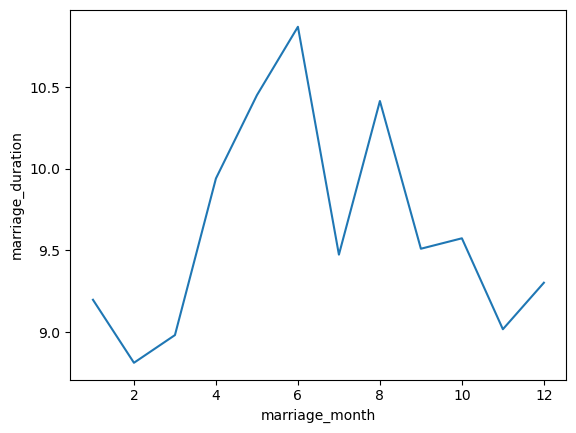

In [308]:
sns.lineplot(data=div, x="marriage_month", y="marriage_duration",errorbar=None)

<Axes: >

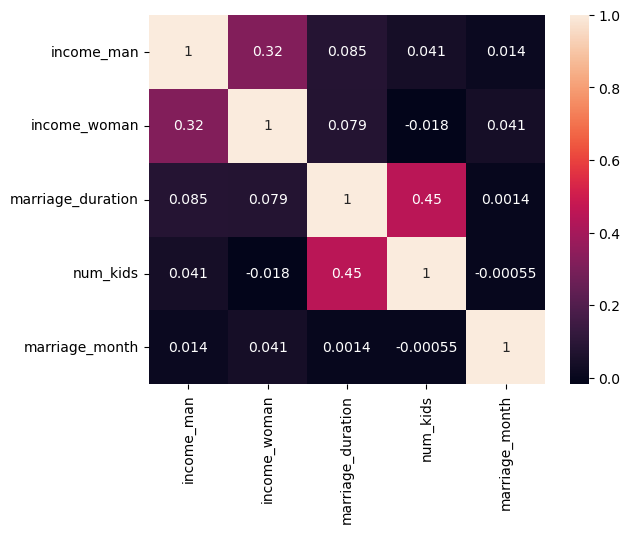

In [310]:
sns.heatmap(div.select_dtypes('number').corr(),annot=True)

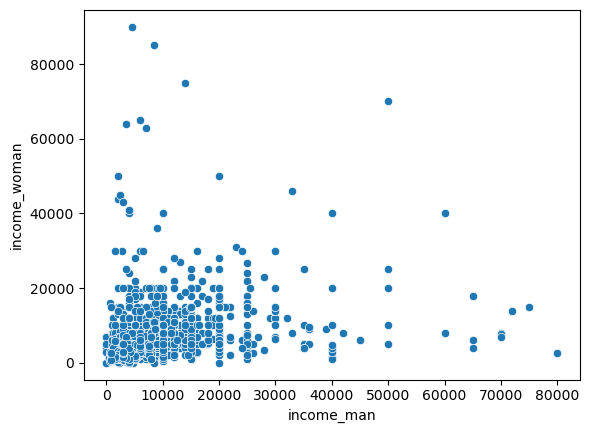

In [312]:
sns.scatterplot(data=div, x="income_man",y="income_woman")
plt.show()

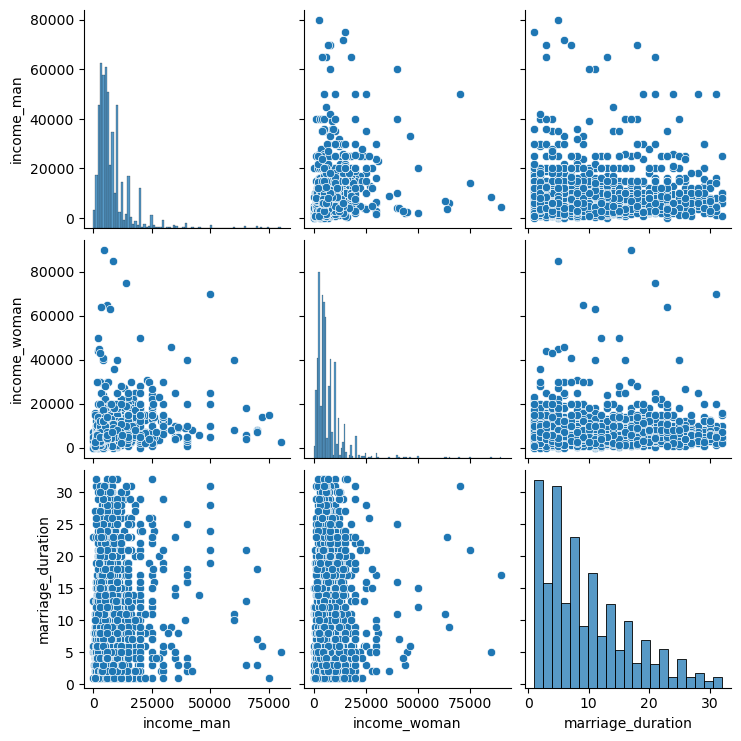

In [316]:
sns.pairplot(data=div,vars=['income_man', 'income_woman', 'marriage_duration'])

In [318]:
div['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

<Axes: xlabel='marriage_duration', ylabel='Count'>

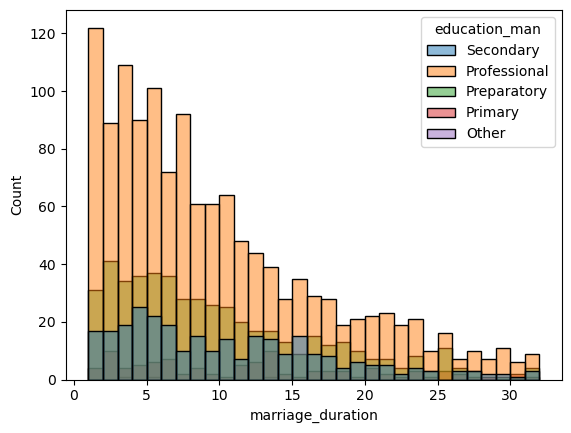

In [320]:
sns.histplot(data=div, x="marriage_duration",hue="education_man",binwidth=1)

<Axes: xlabel='marriage_duration', ylabel='Density'>

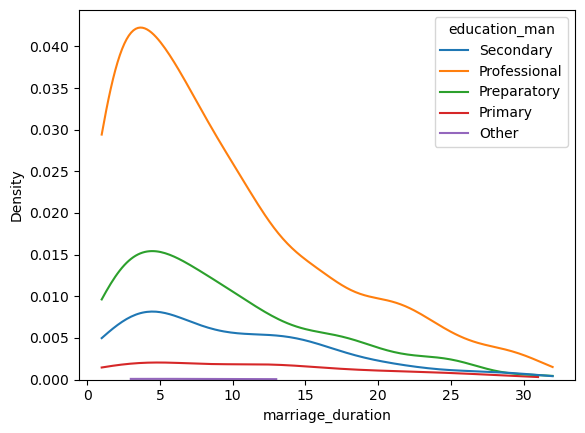

In [322]:
sns.kdeplot(data=div, x="marriage_duration", hue="education_man",cut=0)

<Axes: xlabel='marriage_duration', ylabel='Density'>

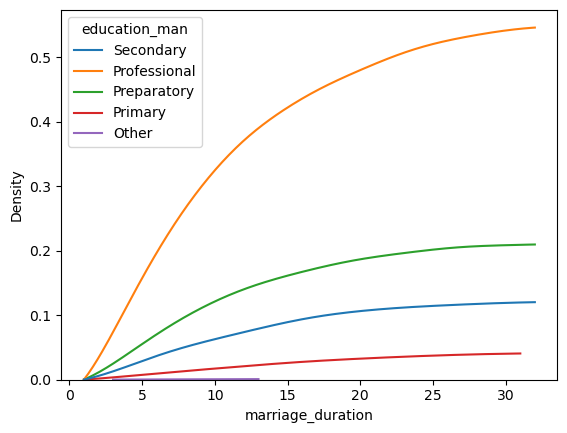

In [324]:
sns.kdeplot(data=div, x="marriage_duration", hue="education_man",cut=0,cumulative=True)

In [326]:
div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   divorce_date       2209 non-null   datetime64[ns]
 1   dob_man            2209 non-null   datetime64[ns]
 2   education_man      2205 non-null   object        
 3   income_man         2209 non-null   float64       
 4   dob_woman          2209 non-null   datetime64[ns]
 5   education_woman    2209 non-null   object        
 6   income_woman       2209 non-null   float64       
 7   marriage_date      2209 non-null   datetime64[ns]
 8   marriage_duration  2209 non-null   float64       
 9   num_kids           1333 non-null   float64       
 10  marriage_month     2209 non-null   int32         
dtypes: datetime64[ns](4), float64(4), int32(1), object(2)
memory usage: 181.3+ KB


In [330]:
div['woman_age_marriage'] = div['marriage_date'].dt.year - div['dob_woman'].dt.year
div['man_age_marriage'] = div['marriage_date'].dt.year - div['dob_man'].dt.year

In [332]:
div.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids,marriage_month,woman_age_marriage,man_age_marriage
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0,6,17,25
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN,9,24,25
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0,2,30,31
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN,5,25,27
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN,8,19,25


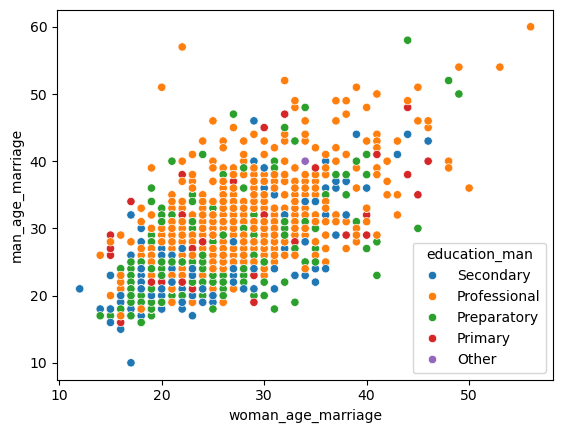

In [338]:
sns.scatterplot(data=div, x="woman_age_marriage", y="man_age_marriage",hue="education_man")
plt.show()

In [503]:
planes = pd.read_csv("Datasets/planes.csv")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [505]:
planes['Destination'].value_counts(normalize=True) #relative class frequency

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

In [507]:
pd.crosstab(planes['Source'], planes['Destination'])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


In [509]:
pd.crosstab(planes['Source'],planes['Destination'],values=planes['Price'],aggfunc='median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


In [511]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops','')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop','')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop',"0")
planes['Total_Stops'] = planes['Total_Stops'].fillna(0)
planes['Total_Stops'] = planes['Total_Stops'].astype(int)

In [513]:
planes['Date_of_Journey'] = pd.to_datetime(planes['Date_of_Journey'],format='%d/%m/%Y')
planes['Date_of_Journey_week'] = planes['Date_of_Journey'].dt.weekday
planes['Date_of_Journey_month'] = planes['Date_of_Journey'].dt.month

In [515]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10233 non-null  object        
 1   Date_of_Journey        10338 non-null  datetime64[ns]
 2   Source                 10473 non-null  object        
 3   Destination            10313 non-null  object        
 4   Route                  10404 non-null  object        
 5   Dep_Time               10400 non-null  object        
 6   Arrival_Time           10466 non-null  object        
 7   Duration               10446 non-null  object        
 8   Total_Stops            10660 non-null  int64         
 9   Additional_Info        10071 non-null  object        
 10  Price                  10044 non-null  float64       
 11  Date_of_Journey_week   10338 non-null  float64       
 12  Date_of_Journey_month  10338 non-null  float64       
dtypes

In [517]:
def duration_mins(durations):
    if not isinstance(durations, str):
        return 0
    
    parts = durations.split()
    hours= 0
    minutes = 0

    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h',''))
        elif 'm' in part:
            minutes = int(part.replace('m',''))
    return hours * 60 + minutes

In [519]:
planes['duration_min'] = planes['Duration'].apply(duration_mins)

In [521]:
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'],format="%H:%M",errors='coerce')

In [523]:
planes['Dep_Time_hour'] = planes['Dep_Time'].dt.hour

In [525]:
def convert_arrival_time(arrival_time):
    if pd.isna(arrival_time):
        return None

    for fmt in ("%H:%M %d %b", "%H:%M"):
        try:
            return datetime.strptime(arrival_time,fmt)
        except:
            continue
    return None

In [531]:
planes['Arrival_Time'] = planes['Arrival_Time'].map(convert_arrival_time)

In [533]:
planes['Arrival_Time_hour'] = planes['Arrival_Time'].dt.hour

In [535]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_week,Date_of_Journey_month,duration_min,Dep_Time_hour,Arrival_Time_hour
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2,No info,13882.0,6.0,6.0,1140,9.0,4.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1,No info,6218.0,6.0,5.0,325,18.0,23.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1,No info,13302.0,4.0,3.0,285,16.0,21.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,1900-01-01 09:00:00,1900-01-01 11:25:00,2h 25m,0,No info,3873.0,0.0,6.0,145,9.0,11.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,1900-01-01 18:55:00,1900-03-13 10:25:00,15h 30m,1,In-flight meal not included,11087.0,1.0,3.0,930,18.0,10.0


<Axes: >

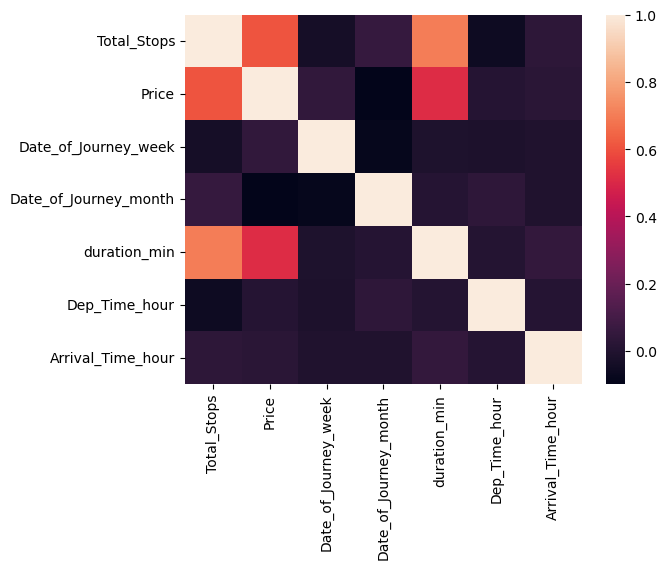

In [547]:
sns.heatmap(planes.select_dtypes('number').corr())

In [549]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_week,Date_of_Journey_month,duration_min,Dep_Time_hour,Arrival_Time_hour
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2,No info,13882.0,6.0,6.0,1140,9.0,4.0
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1,No info,6218.0,6.0,5.0,325,18.0,23.0
2,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,1900-01-01 21:35:00,4h 45m,1,No info,13302.0,4.0,3.0,285,16.0,21.0
3,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,1900-01-01 09:00:00,1900-01-01 11:25:00,2h 25m,0,No info,3873.0,0.0,6.0,145,9.0,11.0
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,1900-01-01 18:55:00,1900-03-13 10:25:00,15h 30m,1,In-flight meal not included,11087.0,1.0,3.0,930,18.0,10.0


In [551]:
planes['Price'].describe()

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64

In [555]:
twenty_fifth_perc_price = planes['Price'].quantile(0.25)
fiftyith_per_price = planes['Price'].quantile(0.50)
seventy_fifth_perc_price = planes['Price'].quantile(0.75)
max_price = planes['Price'].max()

In [557]:
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0, twenty_fifth_perc_price, fiftyith_per_price, seventy_fifth_perc_price, max_price]

In [559]:
planes['price_category'] = pd.cut(planes['Price'], labels=labels, bins=bins)

In [563]:
planes.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_week,Date_of_Journey_month,duration_min,Dep_Time_hour,Arrival_Time_hour,price_category
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,1900-06-10 04:25:00,19h,2,No info,13882.0,6.0,6.0,1140,9.0,4.0,First Class
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,1900-01-01 23:30:00,5h 25m,1,No info,6218.0,6.0,5.0,325,18.0,23.0,Premium Economy


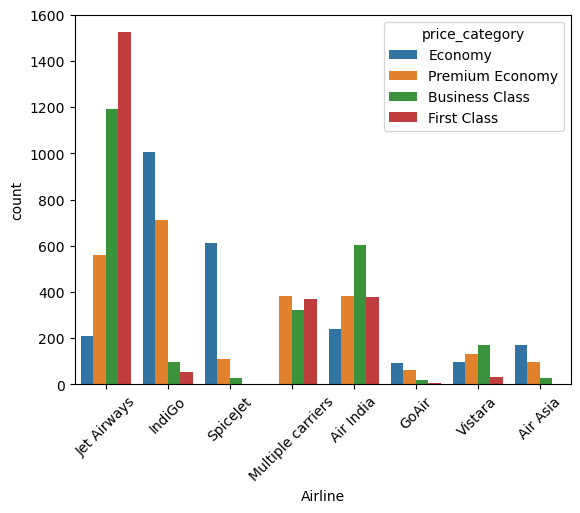

In [571]:
sns.countplot(data=planes, x='Airline',hue="price_category")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='duration_min', ylabel='Price'>

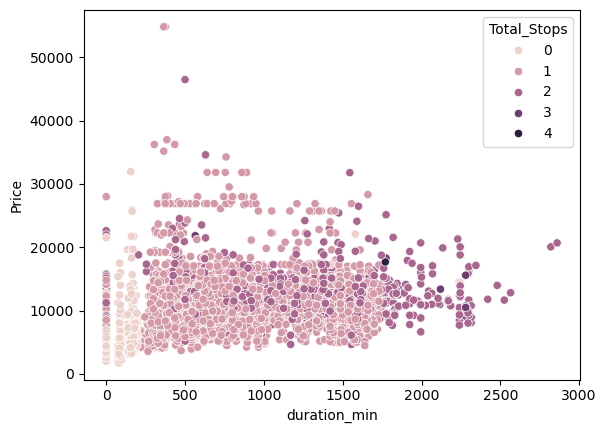

In [575]:
sns.scatterplot(data=planes, x="duration_min", y="Price", hue="Total_Stops")

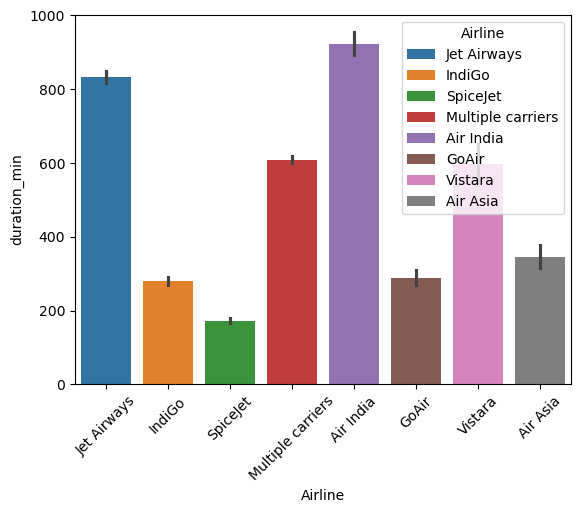

In [581]:
sns.barplot(data=planes, x='Airline', y="duration_min", hue="Airline")
plt.xticks(rotation=45)
plt.show()

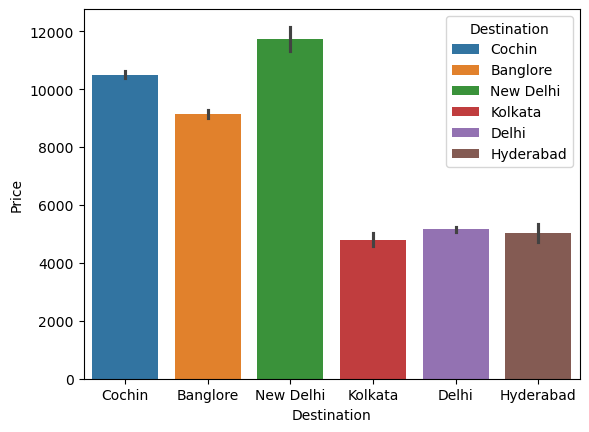

In [587]:
sns.barplot(data=planes, x="Destination", y="Price", hue="Destination")
plt.show()